# Сборный проект №1

## Постановка задачи и загрузка данных

В нашем распоряжение имеется файл, в котором собранны данные о вышедших компьютерных играх до 2016 включительно. Необходимо на основе этих данныех подготовить предложения по компании на следующий год.
Для этого необходимо:

1) Подготовить данные;

2) Провести исследовательский анализ данных;

3) Составить портрет пользователя каждого региона (NA, EU, JP);

4) Проверить гипотезы.

In [206]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as st

data = pd.read_csv('/datasets/games.csv')

Ознакомимся с загруженными данными.

In [207]:
data.head(10)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


In [208]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
Name               16713 non-null object
Platform           16715 non-null object
Year_of_Release    16446 non-null float64
Genre              16713 non-null object
NA_sales           16715 non-null float64
EU_sales           16715 non-null float64
JP_sales           16715 non-null float64
Other_sales        16715 non-null float64
Critic_Score       8137 non-null float64
User_Score         10014 non-null object
Rating             9949 non-null object
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [209]:
data.isna().sum()

Name                  2
Platform              0
Year_of_Release     269
Genre                 2
NA_sales              0
EU_sales              0
JP_sales              0
Other_sales           0
Critic_Score       8578
User_Score         6701
Rating             6766
dtype: int64

In [210]:
data.duplicated().sum()

0

Для дальнейшей работы, необходимо подготовить данные. Прозиведем следубщие действия:

- переименуем столбцы;
- избавимся от пропусков;
- приведем ряд столбцов к верному типу данных;
- убедимся, что категориальные данные (Platfom, Genre, Rating), не имеют неявных дубликатов;

## Подготовка данных

Для начала, переименуем столбцы.

In [211]:
dict_columns ={
    'Name': 'name',
    'Platform': 'platform',
    'Year_of_Release': 'year',
    'Genre': 'genre',
    'NA_sales':'na_sales',
    'EU_sales': 'eu_sales',
    'JP_sales': 'jp_sales',
    'Other_sales': 'other_sales',
    'Critic_Score': 'critic_score',
    'User_Score': 'user_score',
    'Rating': 'rating',
}
data = data.rename(columns=dict_columns)
data

,name,platform,year,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


Теперь, убедимся, что в столбцах `genre`, `platform` и `rating` нет неочивидных дубликатов.

In [212]:
columns = ['genre', 'platform', 'rating']

for name in columns:
    display(data[name].value_counts())

Action          3369
Sports          2348
Misc            1750
Role-Playing    1498
Shooter         1323
Adventure       1303
Racing          1249
Platform         888
Simulation       873
Fighting         849
Strategy         683
Puzzle           580
Name: genre, dtype: int64

PS2     2161
DS      2151
PS3     1331
Wii     1320
X360    1262
PSP     1209
PS      1197
PC       974
XB       824
GBA      822
GC       556
3DS      520
PSV      430
PS4      392
N64      319
XOne     247
SNES     239
SAT      173
WiiU     147
2600     133
GB        98
NES       98
DC        52
GEN       29
NG        12
SCD        6
WS         6
3DO        3
TG16       2
GG         1
PCFX       1
Name: platform, dtype: int64

E       3990
T       2961
M       1563
E10+    1420
EC         8
RP         3
K-A        3
AO         1
Name: rating, dtype: int64

Дубликатов нет.

Далее, ознакомимся с данными, у которых имеются пропуски в столбцах `name, genre, year`.

In [213]:
data.query('name.isna()')

,name,platform,year,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


Пропуски в столбцах `name` и `genre` совпадают. Представленные данные очень старые, их мало в разрезе всей выборки, поэтому их можно исключить.

In [214]:
data_clear = data.dropna(subset=['name']).reset_index(drop=True)
data_clear.isna().sum()

name               0
platform           0
year             269
genre              0
na_sales           0
eu_sales           0
jp_sales           0
other_sales        0
critic_score    8576
user_score      6699
rating          6764
dtype: int64

Теперь ознакомимся с данными, у которых пропуск в столбце `year`

In [215]:
data_clear.query('year.isna()').sort_values(by='na_sales', ascending=False)

,name,platform,year,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
183,Madden NFL 2004,PS2,NaN,Sports,4.26,0.26,0.01,0.71,94.0,8.5,E
609,Space Invaders,2600,NaN,Shooter,2.36,0.14,0.00,0.03,NaN,NaN,NaN
657,Frogger's Adventures: Temple of the Frog,GBA,NaN,Adventure,2.15,0.18,0.00,0.07,73.0,tbd,E
627,Rock Band,X360,NaN,Misc,1.93,0.33,0.00,0.21,92.0,8.2,T
456,LEGO Batman: The Videogame,Wii,NaN,Action,1.80,0.97,0.00,0.29,74.0,7.9,E10+
...,...,...,...,...,...,...,...,...,...,...,...
10999,Demon Chaos,PS2,NaN,Action,0.00,0.00,0.09,0.00,NaN,NaN,NaN
10836,Egg Monster Hero,DS,NaN,Role-Playing,0.00,0.00,0.09,0.00,NaN,NaN,E
15020,Umineko no Naku Koro ni San: Shinjitsu to Gens...,PS3,NaN,Adventure,0.00,0.00,0.02,0.00,NaN,NaN,NaN
10763,Luminous Arc 2 (JP sales),DS,NaN,Role-Playing,0.00,0.00,0.10,0.00,NaN,NaN,NaN


Пропуски имеются в 269 строках, мы можем или удалить эти строки, так как они составляют менее 1% датафрейма или же попробовать заполнить пропуски, средним знаением года выхода для каждой платформа. Ознакомимся со списком платформ в данном фрейме.

In [216]:
data_clear.query('year.isna()').sort_values(by='na_sales', ascending=False)['platform'].value_counts()

Wii     34
PS2     34
X360    30
DS      30
PS3     25
XB      21
PC      17
2600    17
PSP     16
GC      14
GBA     11
3DS      8
PS       7
N64      3
PSV      1
GB       1
Name: platform, dtype: int64

Создадим словарь, где ключами будут названия платформ, а значениями - средние по выборке года выхода игр, округленные до целого.

In [217]:
platform_mean_year = data_clear.pivot_table(index='platform', values='year', aggfunc='mean')
platform_mean_year['year'] = (platform_mean_year['year']).round(0)
platform_mean_year

,year
platform,
2600,1982.0
3DO,1995.0
3DS,2013.0
DC,2000.0
DS,2008.0
GB,1996.0
GBA,2003.0
GC,2003.0
GEN,1993.0


In [218]:
dict_year_p = platform_mean_year['year'].to_dict()
dict_year_p

{'2600': 1982.0,
 '3DO': 1995.0,
 '3DS': 2013.0,
 'DC': 2000.0,
 'DS': 2008.0,
 'GB': 1996.0,
 'GBA': 2003.0,
 'GC': 2003.0,
 'GEN': 1993.0,
 'GG': 1992.0,
 'N64': 1999.0,
 'NES': 1987.0,
 'NG': 1994.0,
 'PC': 2009.0,
 'PCFX': 1996.0,
 'PS': 1998.0,
 'PS2': 2005.0,
 'PS3': 2011.0,
 'PS4': 2015.0,
 'PSP': 2009.0,
 'PSV': 2014.0,
 'SAT': 1996.0,
 'SCD': 1994.0,
 'SNES': 1994.0,
 'TG16': 1995.0,
 'WS': 2000.0,
 'Wii': 2009.0,
 'WiiU': 2014.0,
 'X360': 2010.0,
 'XB': 2004.0,
 'XOne': 2015.0}

Далее, заменил пропуске в столбце `year` начального датафрейма на *none*. После чего заменим это значение на среднее, для каждой платформы.

In [219]:
data_clear['year'] = data_clear['year'].fillna('none')

def replace_year(row):
    if row['year'] == 'none':
        row['year'] = dict_year_p[row['platform']]
        return row
    else:
        return row

data_clear = data_clear.apply(replace_year, axis=1)
data_clear.head(10)

,name,platform,year,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


Убедимся, что изменение выполнено.

In [220]:
data_clear.isna().sum()

name               0
platform           0
year               0
genre              0
na_sales           0
eu_sales           0
jp_sales           0
other_sales        0
critic_score    8576
user_score      6699
rating          6764
dtype: int64

Далее, ознакомимся с пропусками в столбцах `critic_score`, `user_score` и `rating`.

In [221]:
columns = ['critic_score', 'user_score', 'rating']
for col in columns:
    print(col, 'число пропусков:',data_clear[data_clear[col].isna()].shape[0])
    display(data_clear[data_clear[col].isna()].head(10))
    print('________________________________')

critic_score число пропусков: 8576


,name,platform,year,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN
10,Nintendogs,DS,2005.0,Simulation,9.05,10.95,1.93,2.74,NaN,NaN,NaN
12,Pokemon Gold/Pokemon Silver,GB,1999.0,Role-Playing,9.00,6.18,7.20,0.71,NaN,NaN,NaN
18,Super Mario World,SNES,1990.0,Platform,12.78,3.75,3.54,0.55,NaN,NaN,NaN
20,Pokemon Diamond/Pokemon Pearl,DS,2006.0,Role-Playing,6.38,4.46,6.04,1.36,NaN,NaN,NaN
21,Super Mario Land,GB,1989.0,Platform,10.83,2.71,4.18,0.42,NaN,NaN,NaN
22,Super Mario Bros. 3,NES,1988.0,Platform,9.54,3.44,3.84,0.46,NaN,NaN,NaN


________________________________
user_score число пропусков: 6699


,name,platform,year,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN
10,Nintendogs,DS,2005.0,Simulation,9.05,10.95,1.93,2.74,NaN,NaN,NaN
12,Pokemon Gold/Pokemon Silver,GB,1999.0,Role-Playing,9.00,6.18,7.20,0.71,NaN,NaN,NaN
18,Super Mario World,SNES,1990.0,Platform,12.78,3.75,3.54,0.55,NaN,NaN,NaN
20,Pokemon Diamond/Pokemon Pearl,DS,2006.0,Role-Playing,6.38,4.46,6.04,1.36,NaN,NaN,NaN
21,Super Mario Land,GB,1989.0,Platform,10.83,2.71,4.18,0.42,NaN,NaN,NaN
22,Super Mario Bros. 3,NES,1988.0,Platform,9.54,3.44,3.84,0.46,NaN,NaN,NaN


________________________________
rating число пропусков: 6764


,name,platform,year,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN
10,Nintendogs,DS,2005.0,Simulation,9.05,10.95,1.93,2.74,NaN,NaN,NaN
12,Pokemon Gold/Pokemon Silver,GB,1999.0,Role-Playing,9.00,6.18,7.20,0.71,NaN,NaN,NaN
18,Super Mario World,SNES,1990.0,Platform,12.78,3.75,3.54,0.55,NaN,NaN,NaN
20,Pokemon Diamond/Pokemon Pearl,DS,2006.0,Role-Playing,6.38,4.46,6.04,1.36,NaN,NaN,NaN
21,Super Mario Land,GB,1989.0,Platform,10.83,2.71,4.18,0.42,NaN,NaN,NaN
22,Super Mario Bros. 3,NES,1988.0,Platform,9.54,3.44,3.84,0.46,NaN,NaN,NaN


________________________________


Число пропусков большое, и по всей видимости, они происходят в одинх и те же строчках, для трех столбцов. Удалять такие пропуски нельзя. Заменить на среднее или медиану тоже не правильно, и ввиду большое числа пропусков, и ввиду того, что данные величины независимы друг от друга и нам не известно их распределение. Поэтому, проверим, число оценок критиков и пользователей равное 0, и если их будет незначительное количество, заменими NaN в этих столбцах на 0.

Для столбца `rating` NaN заменим на *unknow*.

In [222]:
print('Число оценок пользователей = 0:',data_clear.query('user_score == "0"').shape[0])
print('Число критиков пользователей = 0:',data_clear.query('critic_score == 0').shape[0])

Число оценок пользователей = 0: 1
Число критиков пользователей = 0: 0


In [223]:
data_clear['critic_score'] = data_clear['critic_score'].fillna(0)
data_clear['user_score'] = data_clear['user_score'].fillna(0)
data_clear['rating'] = data_clear['rating'].fillna('unknow')
data_clear

,name,platform,year,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,0.0,0,unknow
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,0.0,0,unknow
...,...,...,...,...,...,...,...,...,...,...,...
16708,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,0.0,0,unknow
16709,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,0.0,0,unknow
16710,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,0.0,0,unknow
16711,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,0.0,0,unknow


Отдельно разберем ситуацию, когда `user_scrore` = *tbd*. Посмотрим, какой процент данное значение составлет от общего количества данных по годам, платформам и жанрам.

In [224]:
data_clear.query('user_score == "tbd"')

,name,platform,year,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
119,Zumba Fitness,Wii,2010.0,Sports,3.45,2.59,0.0,0.66,0.0,tbd,E
301,Namco Museum: 50th Anniversary,PS2,2005.0,Misc,2.08,1.35,0.0,0.54,61.0,tbd,E10+
520,Zumba Fitness 2,Wii,2011.0,Sports,1.51,1.03,0.0,0.27,0.0,tbd,T
645,uDraw Studio,Wii,2010.0,Misc,1.65,0.57,0.0,0.20,71.0,tbd,E
657,Frogger's Adventures: Temple of the Frog,GBA,2003.0,Adventure,2.15,0.18,0.0,0.07,73.0,tbd,E
...,...,...,...,...,...,...,...,...,...,...,...
16693,Planet Monsters,GBA,2001.0,Action,0.01,0.00,0.0,0.00,67.0,tbd,E
16695,Bust-A-Move 3000,GC,2003.0,Puzzle,0.01,0.00,0.0,0.00,53.0,tbd,E
16696,Mega Brain Boost,DS,2008.0,Puzzle,0.01,0.00,0.0,0.00,48.0,tbd,E
16702,Plushees,DS,2008.0,Simulation,0.01,0.00,0.0,0.00,0.0,tbd,E


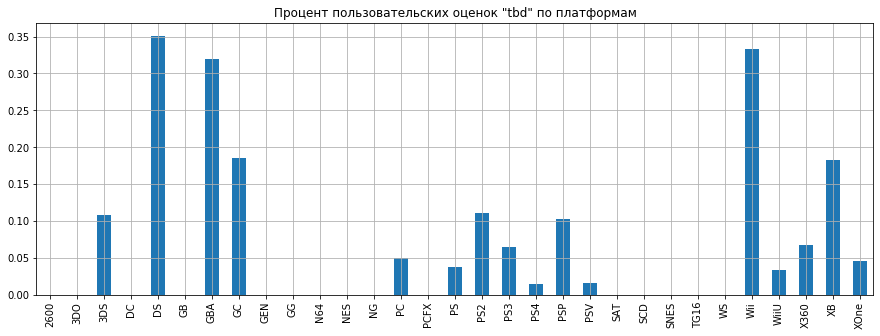

In [225]:
((data_clear.query('user_score == "tbd"')['platform'].value_counts() / data_clear['platform'].value_counts()).round(3)
 .plot(kind='bar', figsize=(15,5), grid=True, title='Процент пользовательских оценок "tbd" по платформам'))

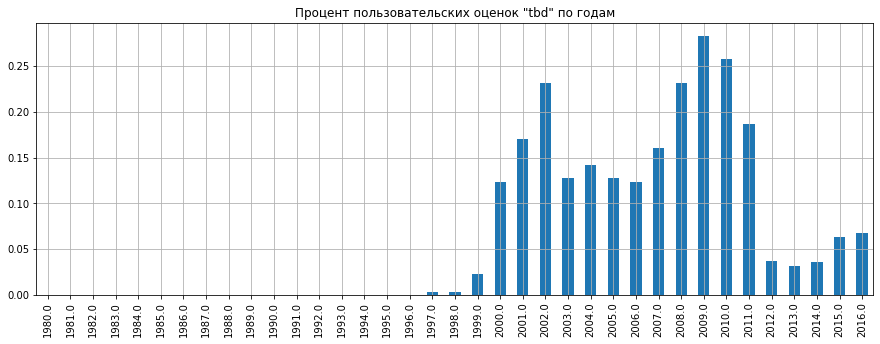

In [226]:
((data_clear.query('user_score == "tbd"')['year'].value_counts() / data_clear['year'].value_counts()).round(3)
 .plot(kind='bar', figsize=(15,5), grid=True, title='Процент пользовательских оценок "tbd" по годам'))

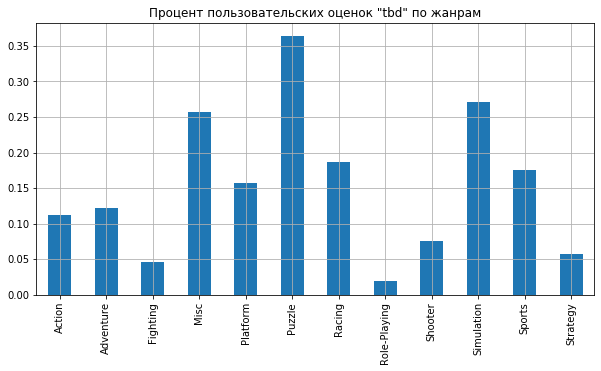

In [227]:
((data_clear.query('user_score == "tbd"')['genre'].value_counts() / data_clear['genre'].value_counts()).round(3)
 .plot(kind='bar', figsize=(10,5), grid=True, title='Процент пользовательских оценок "tbd" по жанрам'))

Видно, что распределение долей данных с этим показателем не равномерное. Его природа скорее всего лежит в особенностях оценивания игр на той платформе, с которой были полученны данные. При этом количество строк, с таким значением достаточное большое, около 14%. Выкинуть такие данные нельзя, а вот заменить можно. Узнает, сколько строк, у которые `user_scrore` = *tbd* имеют не нулевые оценки от критиков.

In [228]:
data_clear.query('user_score == "tbd"')['critic_score'].value_counts()

0.0     1342
66.0      46
65.0      44
68.0      43
70.0      42
        ... 
23.0       1
85.0       1
89.0       1
87.0       1
32.0       1
Name: critic_score, Length: 66, dtype: int64

Около 1000 строк. На данном этапе, введем допущение, что оценки критиков и игроков имеют положительную корреляцию и, при приведение в одну шкалу оценки, будут близки друг к другу. Тогда, значения *tbd*, в тех строках, где оценка критиков не нулевая, мы можем заменить на оценку критиков. Учитывая, что количество таких строк составит около 6%, значительного влияния на данные это не окажет.

Так же, для удобства работы в дальнейшем, приведем оценки критиков и игроков к одной шкале. Это позволит при визуализации использовать одни и те же оси, и при этом ошибка, полученная из-за такого преобразования, будет мала.

In [229]:
def replace_score(row):
    if row['user_score'] == 'tbd':
        row['user_score'] = row['critic_score']
        return row
    else:
        row['user_score'] = float(row['user_score']) * 10
        return row

data_clear = data_clear.apply(replace_score, axis=1)

data_clear

,name,platform,year,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,80.0,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,0.0,0.0,unknow
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,83.0,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,80.0,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,0.0,0.0,unknow
...,...,...,...,...,...,...,...,...,...,...,...
16708,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,0.0,0.0,unknow
16709,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,0.0,0.0,unknow
16710,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,0.0,0.0,unknow
16711,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,0.0,0.0,unknow


In [230]:
data_clear.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16713 entries, 0 to 16712
Data columns (total 11 columns):
name            16713 non-null object
platform        16713 non-null object
year            16713 non-null float64
genre           16713 non-null object
na_sales        16713 non-null float64
eu_sales        16713 non-null float64
jp_sales        16713 non-null float64
other_sales     16713 non-null float64
critic_score    16713 non-null float64
user_score      16713 non-null float64
rating          16713 non-null object
dtypes: float64(7), object(4)
memory usage: 1.4+ MB


Теперь, когда в датафрейме нет пропусков, приведем типы данных.

In [231]:
data_clear['year'] = data_clear['year'].astype('int64')
data_clear['critic_score'] = data_clear['critic_score'].astype('int64')
data_clear['user_score'] = data_clear['user_score'].astype('int64')
data_clear.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16713 entries, 0 to 16712
Data columns (total 11 columns):
name            16713 non-null object
platform        16713 non-null object
year            16713 non-null int64
genre           16713 non-null object
na_sales        16713 non-null float64
eu_sales        16713 non-null float64
jp_sales        16713 non-null float64
other_sales     16713 non-null float64
critic_score    16713 non-null int64
user_score      16713 non-null int64
rating          16713 non-null object
dtypes: float64(4), int64(3), object(4)
memory usage: 1.4+ MB


Далее, посчитаем сумарные продажи для каждой игры.

In [232]:
data_clear['sales'] = data_clear['na_sales'] + data_clear['eu_sales'] + data_clear['other_sales'] + data_clear['jp_sales']
data_clear

,name,platform,year,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76,80,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,0,0,unknow,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82,83,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80,80,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,0,0,unknow,31.38
...,...,...,...,...,...,...,...,...,...,...,...,...
16708,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,0,0,unknow,0.01
16709,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,0,0,unknow,0.01
16710,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,0,0,unknow,0.01
16711,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,0,0,unknow,0.01


### Вывод

Была произведена подготовка данных для дальнейшей работы, были обработаны пропуски в данных, часть данных была приведена к необходимому типу данных, а так же были высчитаны суммарные продажи игр.

## Исследовательский анализ данных

Ознакомимся с распределением количества выпущенных игр по годам. Сначала получим числовое описание данных, после чего построим гистограмму и определим, весь ли период, представленных в данных, нас интересует.

In [233]:
data_clear['year'].describe()

count    16713.000000
mean      2006.473883
std          5.895668
min       1980.000000
25%       2003.000000
50%       2007.000000
75%       2010.000000
max       2016.000000
Name: year, dtype: float64

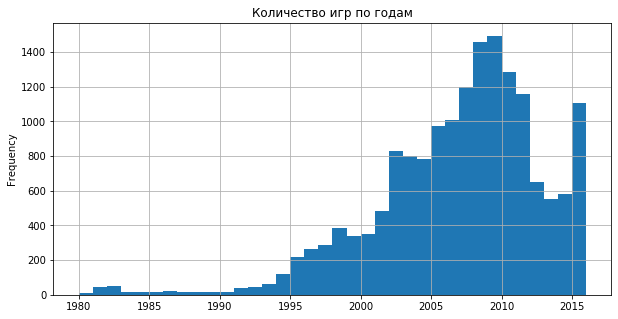

In [234]:
data_clear['year'].plot(kind='hist', bins=[x for x in range(1980, 2017)],
                        grid=True, figsize=(10,5), title='Количество игр по годам')

По гистограмме видно, что с 2002 года происзодит резкое увеличение количества выпускаемых в год игр. При этом, числовое описание данных говорит о том, что до 2003 года было выпущено всего 25% игр из выборки. Только по этим показателям, можно говорить о том, что данные об играх, выпущенных ранее 2003 года не представляют большого интереса. Таким образом, можно выделить период, который представляет для исследования интерес с 2003 по 2016 год.

Альтернативным вариантом будет использовать период с 2007 по 2016, когда было выпущено половина игр всей выборки. Для окончательного выбора, ознакомимся с показателями продаж по платформам и по годам.

Рассмотрим, количество проданных копий игр для каждой платформы и выберем топ с наибольшими продажами.

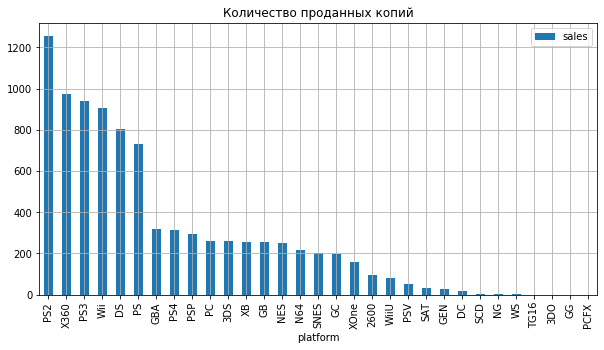

In [235]:
(data_clear
     .pivot_table(index='platform', values='sales', aggfunc='sum')
     .sort_values(by='sales', ascending=False)
     .plot(kind='bar', grid=True, figsize=(10,5), title='Количество проданных копий'))

По полосчатой диаграмме видно, что 6 платформ сильно выделяются на фоне всей выборке, выберем их для ознакомления с продажами по годам.

In [236]:
top_platform = (data_clear
     .pivot_table(index='platform', values='sales', aggfunc='sum')
     .sort_values(by='sales', ascending=False)).iloc[:6]

In [237]:
value_p_y = (data_clear
             .pivot_table(index='platform', columns='year', values='sales', aggfunc='sum'))
value_p_y = value_p_y.query('platform in @top_platform.index')

value_p_y

year,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
platform,,,,,,,,,,,,,,,,,,,,,
DS,NaN,NaN,NaN,NaN,NaN,0.02,NaN,NaN,NaN,NaN,...,146.94,148.65,119.54,85.02,26.18,11.01,1.54,NaN,NaN,NaN
PS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
PS2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,75.99,53.90,26.40,5.64,0.45,NaN,NaN,NaN,NaN,NaN
PS3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,73.19,118.52,130.93,142.17,165.09,107.36,113.25,47.76,16.82,3.60
Wii,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,152.77,171.32,223.30,127.95,59.65,21.71,8.59,3.75,1.14,0.18
X360,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,95.41,135.26,120.29,180.21,143.84,99.74,88.58,34.74,11.96,1.52


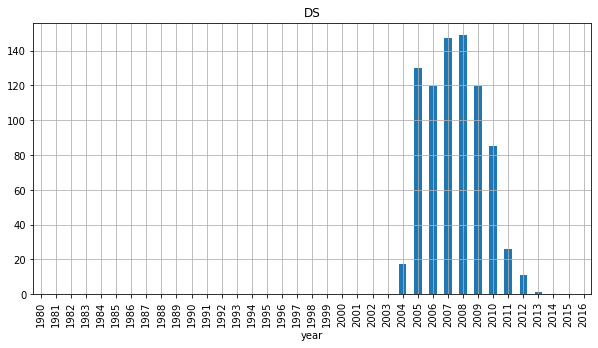

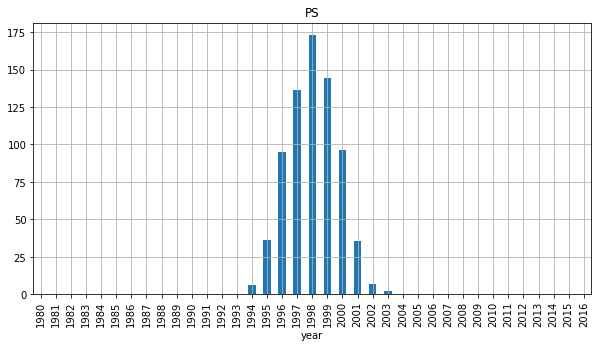

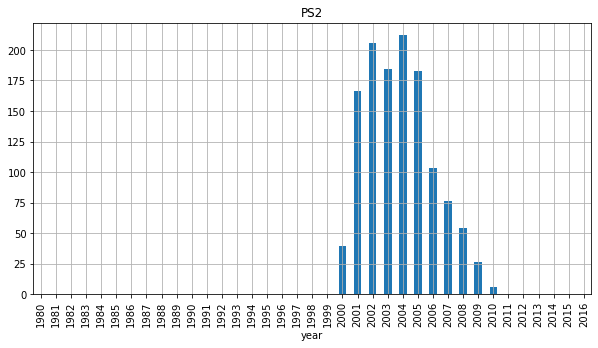

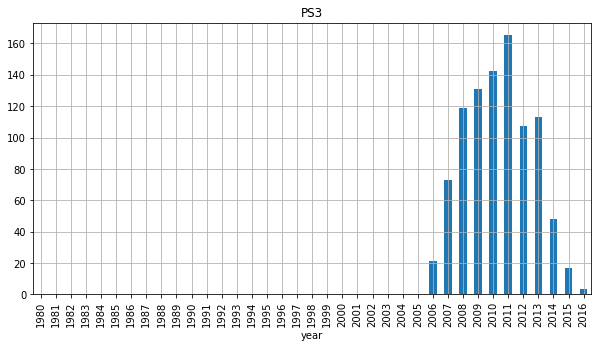

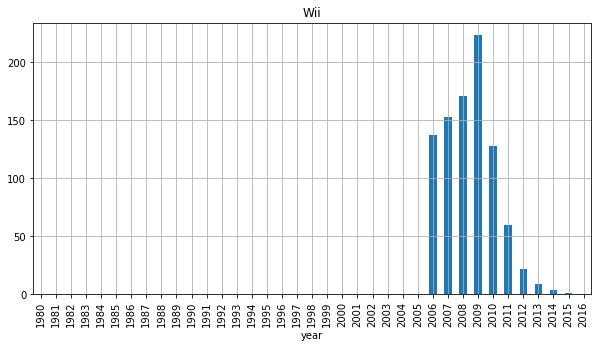

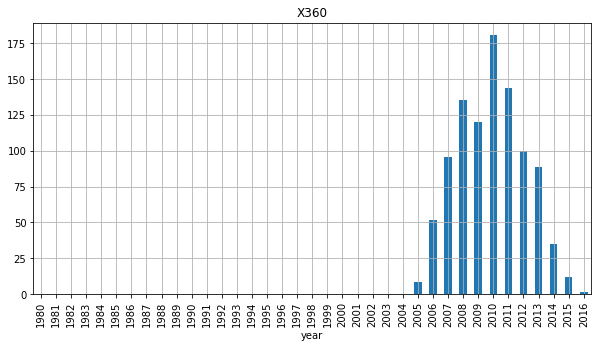

In [238]:
value_p_y_t = value_p_y.transpose()

columns = list(value_p_y_t.columns)
for name in columns:
    display(value_p_y_t[name].plot(kind='bar', grid=True, title=name, figsize=(10,5)))
    plt.show()

Да полосчатым диаграммам видно, что платформы "живут" в среднем 9 лет. Смена "покаления" платформы у PS происходит раз в 6 лет.

На основе исследования количества выпущенных игр по годам и продаж игр на самых популярных платформах, выберем актуальный период 9 лет - с 2007 по 2016 включительно. За этот период было выпущено 50% всех игр в выборке, а так же в него укладывается срок "жизни" одной платформы.
Создадим датафрейм с выборков за актуальный период.

In [239]:
data_actual = data_clear.query('year >= 2007').reset_index(drop=True)
data_actual

,name,platform,year,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sales
0,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82,83,E,35.52
1,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80,80,E,32.77
2,New Super Mario Bros. Wii,Wii,2009,Platform,14.44,6.94,4.70,2.24,87,84,E,28.32
3,Wii Fit,Wii,2007,Sports,8.92,8.03,3.60,2.15,80,77,E,22.70
4,Kinect Adventures!,X360,2010,Misc,15.00,4.89,0.24,1.69,61,63,E,21.82
...,...,...,...,...,...,...,...,...,...,...,...,...
9483,Aiyoku no Eustia,PSV,2014,Misc,0.00,0.00,0.01,0.00,0,0,unknow,0.01
9484,SCORE International Baja 1000: The Official Game,PS2,2008,Racing,0.00,0.00,0.00,0.00,0,0,unknow,0.00
9485,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,0,0,unknow,0.01
9486,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,0,0,unknow,0.01


Определим динамику продаж по платформам в новом датафрейме. 2016 год уберем из расчётов, ввиду того, что данные по нему могут быть не полные.

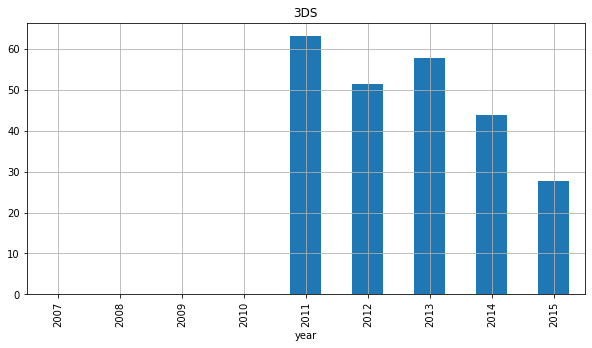

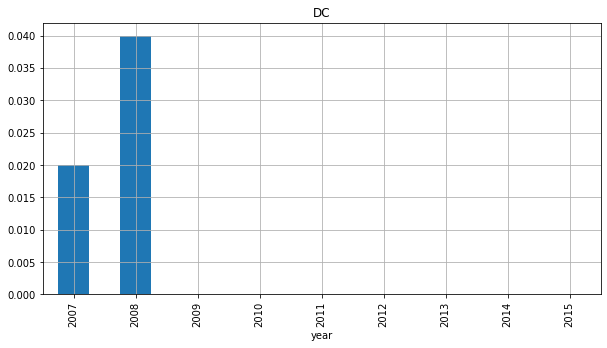

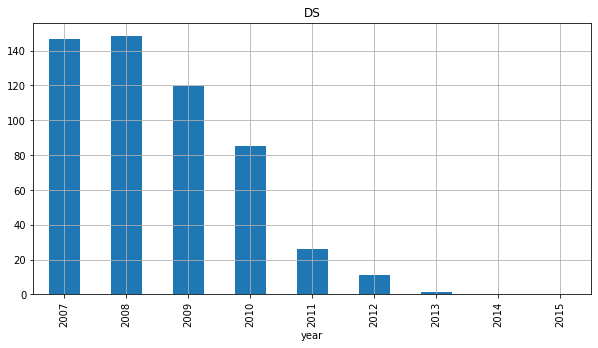

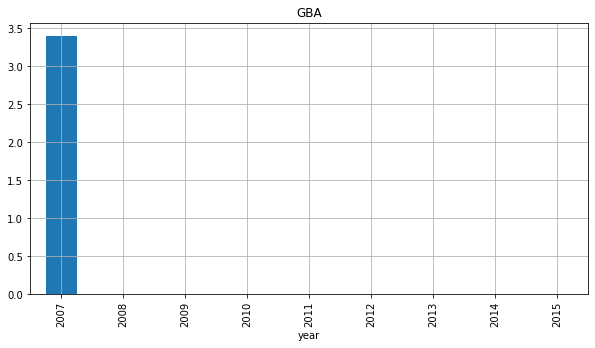

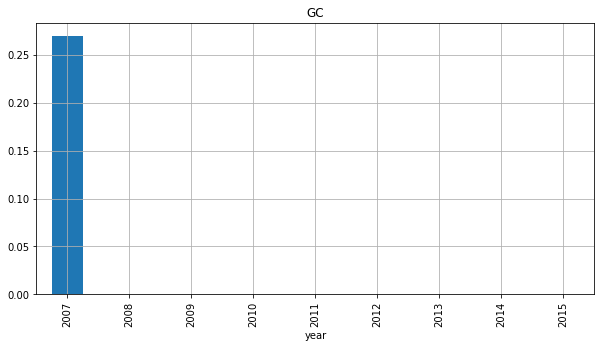

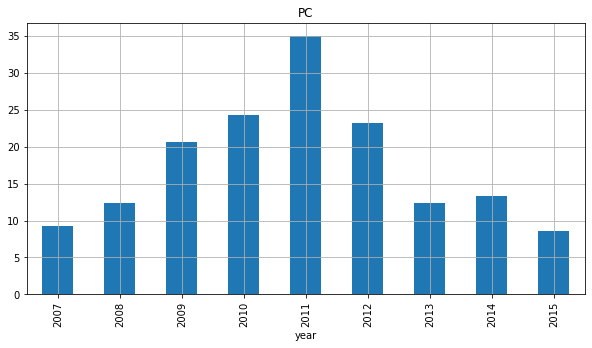

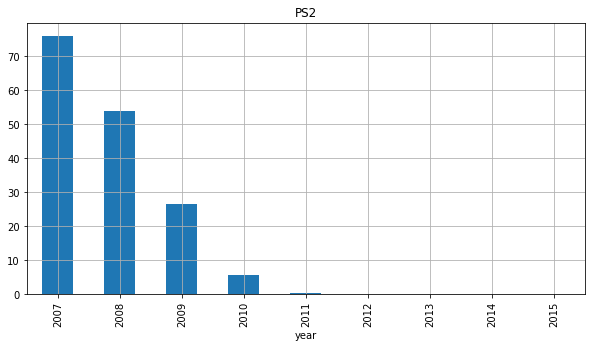

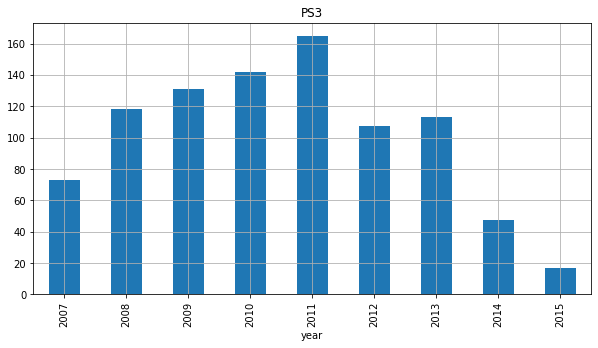

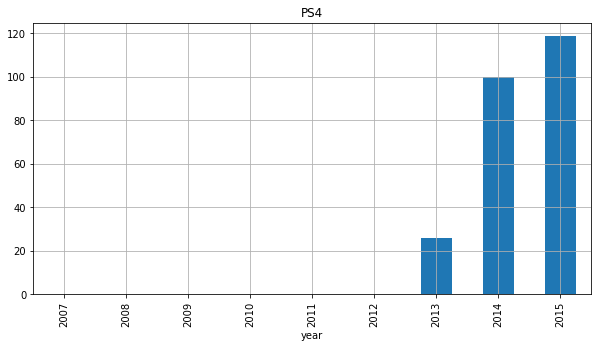

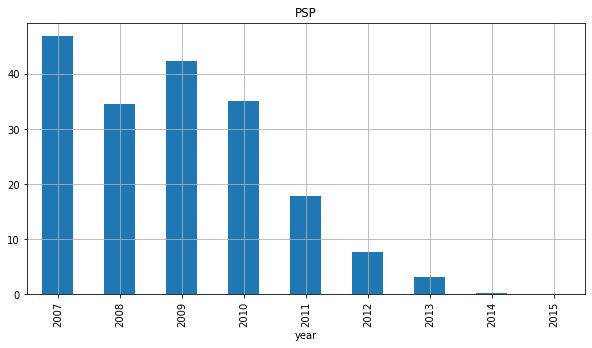

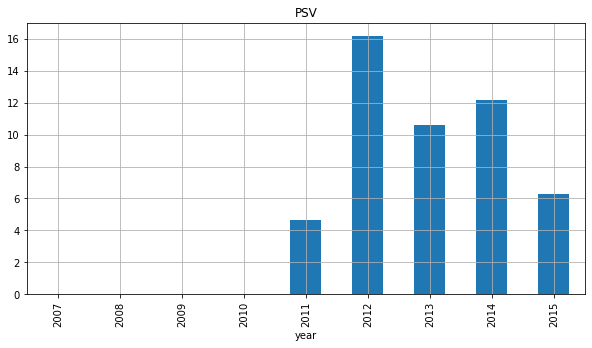

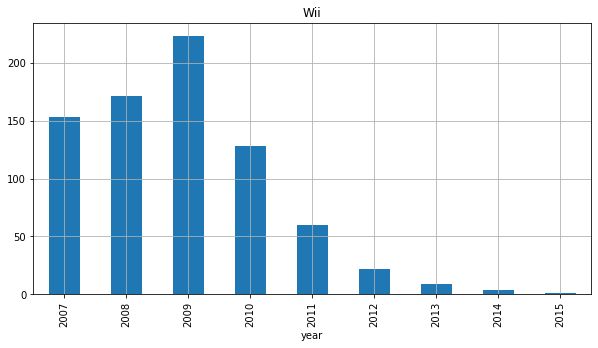

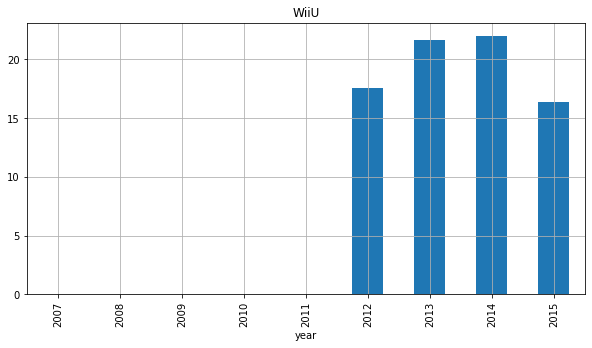

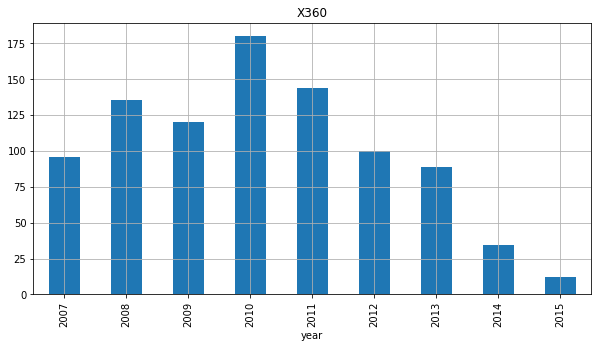

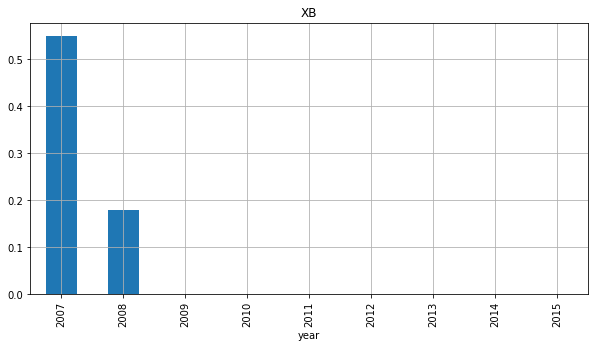

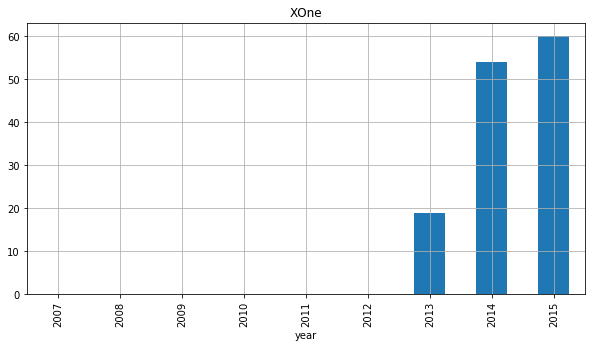

In [240]:
actual_platform = (data_actual
                  .pivot_table(index='platform', columns='year', values='sales', aggfunc='sum'))
actual_platform_t = actual_platform.transpose()
actual_platform_t = actual_platform_t.drop(index=2016)

columns = list(actual_platform_t.columns)
for name in columns:
    display(actual_platform_t[name].plot(kind='bar', grid=True, title=name, figsize=(10,5)))
    plt.show()

Среди всех платформ, наибольший интерес представляют:

- PS4
- XOne
- WiiU

Продажи игр на этих платформах на растут, так же, можно обратить внимание на платформу *PC*, продажи игр на ней достаточно стабильны последние 3 года, на фоне других платформ, что покрывает их небольшое количество, в сравнение с вышеупомянутыми платформами.

Платформы *X360*, *PS3*, *PSV*, *3DS* показывали последние годы отрицательную динамику, скорее всего по итоговым данным 2016 годы они продолжат падать в продажах игр, а на 2017 год могут закончить свой жизненый цикл. Данные платформы наименее интересны.

/opt/conda/lib/python3.7/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


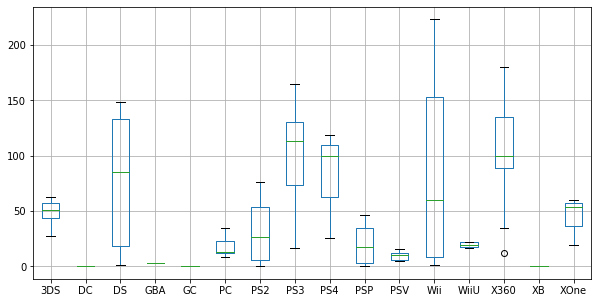

In [241]:
actual_platform_t.boxplot(figsize=(10,5))

Комментарий к графику:

Чем шире "ящик" платформы, тем большая часть жизненного цикла платформы попала в актуальные данные (при условие, что в ходе жизненного цикла продажи игр на платформе распределены нормально). По графику видно, что жизненный уикл платформ `DS` и `Wii` почти полностью вошел в актуальную выборку.

Расположение медиан, говорит о наиболее популярных среди игроков платформах, чем выше расположена на графике медиана, тем лучшие продажи показывала платформа в актуальной выборке.

Ширина "усов" показывает насколько равномерно по годам шли продажи игр на платформе. Чем длинне какой-либо "ус", тем большее падение/рост показывали продажи игр на платформе к предидущему году.

Далее, рассмотрим, как влияю на продажи игр внитри популярной платформы оценки критиков и игроков. В качестве такой платформы выберем *PS3*. Для начала обработаем выбросы.

count    1304.000000
mean        0.704517
std         1.397810
min         0.000000
25%         0.100000
50%         0.270000
75%         0.750000
max        21.050000
Name: sales, dtype: float64

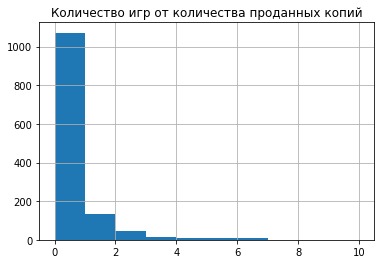

In [242]:
display(data_actual.query('platform == "PS3"')['sales'].describe())
display(data_actual.query('platform == "PS3"')['sales'].hist(bins=[x for x in range(0,11)]))
plt.title('Количество игр от количества проданных копий')
plt.show()

Примем за выбросы игры с значением `sales` > 4 и построим диаграммы рассеивания, сначала для двух оценок сразу, затем для каждой по отдельности.

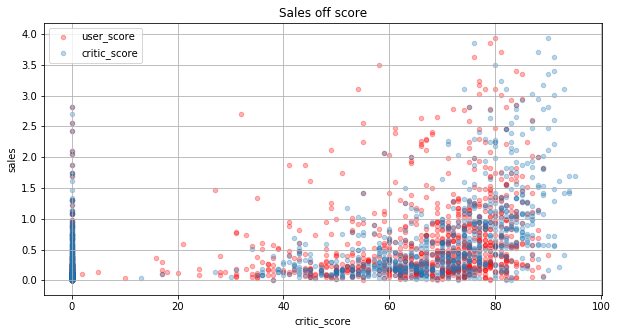

In [243]:
ax = (data_actual
 .query('platform == "PS3" and sales < 4')
 .plot(kind='scatter', x='user_score', y='sales',
       grid=True, figsize=(10,5), label='user_score', color='r', alpha=0.3))
(data_actual
 .query('platform == "PS3" and sales < 4')
 .plot(kind='scatter', x='critic_score', y='sales',
       grid=True, figsize=(10,5), label='critic_score', ax=ax, title='Sales off score', alpha=0.3))


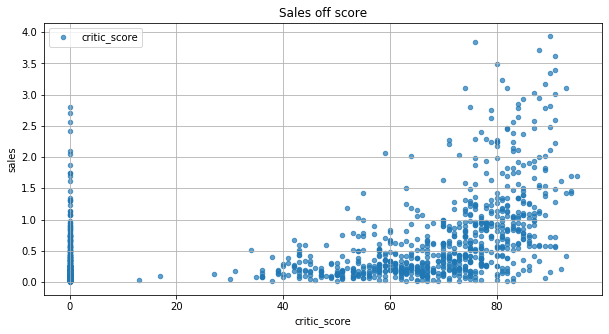

In [244]:
(data_actual
 .query('platform == "PS3" and sales < 4')
 .plot(kind='scatter', x='critic_score', y='sales', grid=True,
       figsize=(10,5), label='critic_score', title='Sales off score', alpha=0.7))

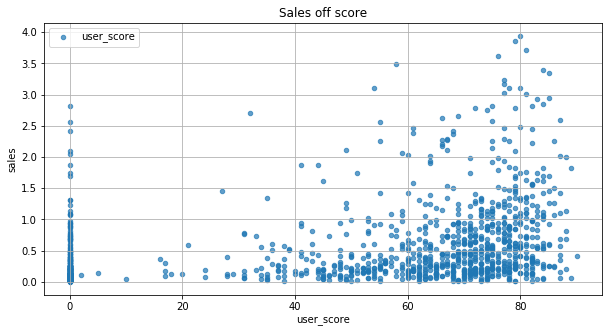

In [245]:
(data_actual
 .query('platform == "PS3" and sales < 4')
 .plot(kind='scatter', x='user_score', y='sales', grid=True,
       figsize=(10,5), label='user_score', title='Sales off score', alpha=0.7))

Уже по диаграммам рассеивания видно, что оценки пользователей оказывают меньшее влияние на продажи игр - точки менее сгруппированы и не образуют тенденции.

Оценки же критиков сильнее сгруппированы и складываются в достаточно четкую тенденцию, напоминающую ветви пологой параболы, что говорит о более сильном влияние на число проданных копий игры.

Потвердим предположение, высчитав корреляцию для оценок пользователей и критиков к числу проданных копий игр. Для высчитывания коэффицента корреляции уберем из выборки выбросы, а так же игры, у которых не известна оценка.

In [246]:
x_1 = data_actual.query('platform == "PS3" and sales < 4 and critic_score != 0')
x_2 = data_actual.query('platform == "PS3" and sales < 4 and user_score != 0')

print('Коэффициент корреляции оценок критиков и продажами:', (x_1['critic_score'].corr(x_1['sales'])).round(2))
print('Коэффициент корреляции оценок игроков и продажами:', (x_2['user_score'].corr(x_2['sales'])).round(2))

Коэффициент корреляции оценок критиков и продажами: 0.53
Коэффициент корреляции оценок игроков и продажами: 0.27


Вычисление подтверждает предположение - оценки критиков сильнее (причем заметно) влияют на количество проданных копий игры.

Проверим справедливать сделанных выводов и для других платформ в актуальной выборке.

In [247]:
platforms = list(data_actual['platform'].unique())

for platform in platforms:
    x_1 = data_actual.query('platform == @platform and critic_score != 0')
    x_2 = data_actual.query('platform == @platform and user_score != 0')
    print(platform)
    try:
        print('Коэффициент корреляции оценок критиков и продажами:', (x_1['critic_score'].corr(x_1['sales'])).round(2))
        print('Коэффициент корреляции оценок игроков и продажами:', (x_2['user_score'].corr(x_2['sales'])).round(2))
    except:
        print('Коэффициент корреляции оценок критиков и продажами:', x_1['critic_score'].corr(x_1['sales']))
        print('Коэффициент корреляции оценок игроков и продажами:', x_2['user_score'].corr(x_2['sales']))
    print('__________________________________________________')

Wii
Коэффициент корреляции оценок критиков и продажами: 0.24
Коэффициент корреляции оценок игроков и продажами: 0.16
__________________________________________________
X360
Коэффициент корреляции оценок критиков и продажами: 0.4
Коэффициент корреляции оценок игроков и продажами: 0.12
__________________________________________________
PS3
Коэффициент корреляции оценок критиков и продажами: 0.43
Коэффициент корреляции оценок игроков и продажами: 0.13
__________________________________________________
DS
Коэффициент корреляции оценок критиков и продажами: 0.28
Коэффициент корреляции оценок игроков и продажами: 0.21
__________________________________________________
PS4
Коэффициент корреляции оценок критиков и продажами: 0.41
Коэффициент корреляции оценок игроков и продажами: -0.03
__________________________________________________
3DS
Коэффициент корреляции оценок критиков и продажами: 0.35
Коэффициент корреляции оценок игроков и продажами: 0.24
___________________________________________

/opt/conda/lib/python3.7/site-packages/numpy/lib/function_base.py:2551: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar)
/opt/conda/lib/python3.7/site-packages/numpy/lib/function_base.py:2480: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)


Из нашего предположения выбиваются платформы: *XB*, *GC*, *DC*, *GBA*. А так же *WiiU*, но в значительно меньшей степени. Рассмотрим их подробнее.

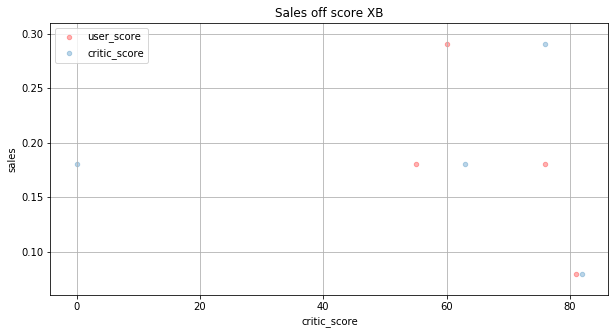

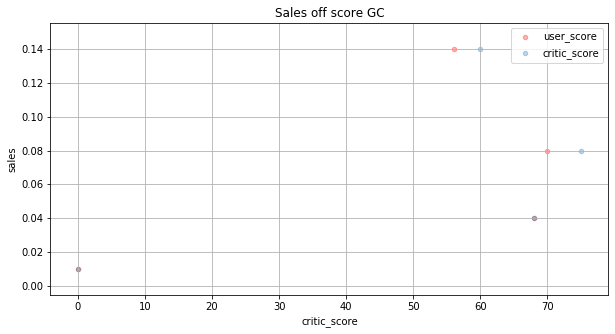

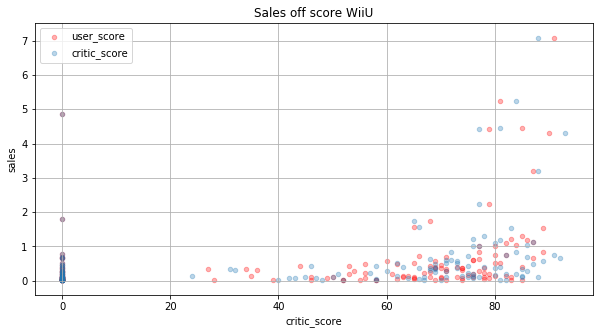

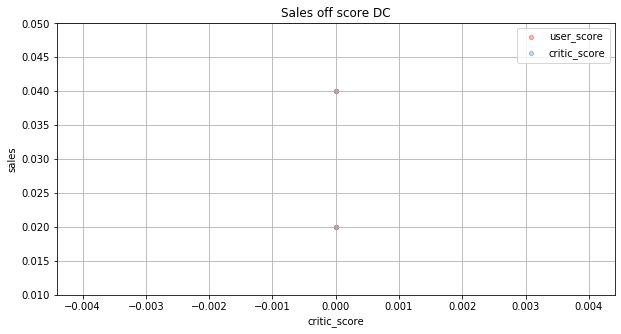

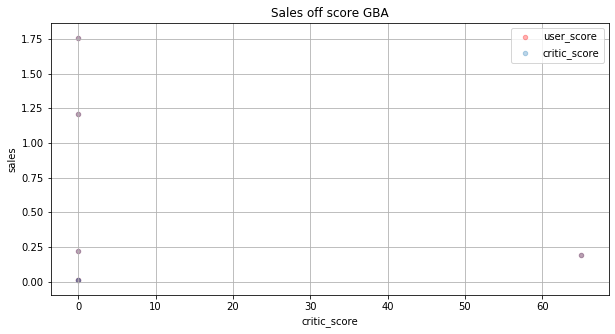

In [248]:
platforms = ['XB', 'GC', 'WiiU', 'DC', 'GBA']
for p in platforms:
    ax = (data_actual
     .query('platform == @p')
     .plot(kind='scatter', x='user_score', y='sales',
           grid=True, figsize=(10,5), label='user_score', color='r', alpha=0.3))
    (data_actual
     .query('platform == @p')
     .plot(kind='scatter', x='critic_score', y='sales',
           grid=True, figsize=(10,5), label='critic_score', ax=ax, title=f'Sales off score {p}', alpha=0.3))


Несоответствие коэффициента корреляции нашим ожиадние во всех случаях, кроме платформы *WiiU* связано с маленькой выборкой данных. Для *WiiU* расхождение результата и ожиданий хоть и имеется, но носит незначительный характер, что в купе с небольшой выборкой (хоть и достаточно репрезентабельной, на фоне других платформ в проверочном исследование), дает право утверждать, что наше предположение все же верно - **оценки критиков сильнее влияют на продажи, чем оценки игроков**.

Теперь, рассмотрим средние и суммарные продажи игр по жанрам.

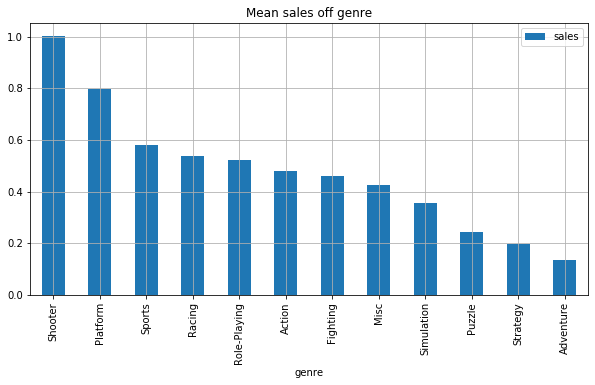

In [249]:
(data_actual
     .pivot_table(index='genre', values='sales', aggfunc='mean')
     .sort_values(by='sales', ascending=False)
     .plot(kind='bar', grid=True, figsize=(10,5), title='Mean sales off genre'))

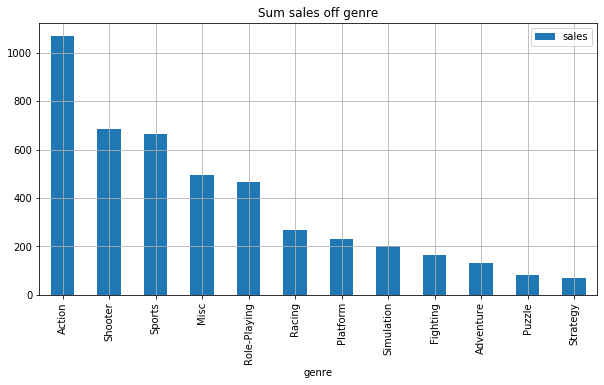

In [250]:
(data_actual
     .pivot_table(index='genre', values='sales', aggfunc='sum')
     .sort_values(by='sales', ascending=False)
     .plot(kind='bar', grid=True, figsize=(10,5), title='Sum sales off genre'))

Из графиков видно, что жарны *Shooter* и *Platform* продаются наибольшими тиражами. Однако говорить о прибыльности какого-либо жанра нельзя, поскольку не известно, равна ли себестоимость игр на разных жанрах. Поэтому будет отталкиваться только от средних и абсолютных продаж.

Наименее интересными являются жанры *Puzzle*, *Strategy* и *Adventure*. Они в среднем продаются наименьшими тиражами, а так же имеют наименьшие абсолютные показатели продаж.

### Вывод

В данной главе, был произведен анализ подготовленных данных, было установлено что:

1) С 2002 года произошел заметный рост продаж игр. Средний срок жизненного цикла платформы составляет 9 лет.

2) Для последующего анализа следует использовать период с 2007 по 2016 год.

3) Наиболее привлекательными платформами для игр на ближайшее время являются *PS4*, *XOne*, *WiiU*.

4) Существует достаточно сильная положительная зависимость между оценками критиков и продажами игр. Зависимость между оценками игроков и продажами так же есть, но существенно меньше. Это утверждение справедливо для всех актуальных платформ.

5) Жанры *Shooter* и *Platform* показывают наилучшие средние продажи. 

## Портрет пользователя

Для начала, рассмотрим в каких долях приходятся продажи игр на разные регионы.

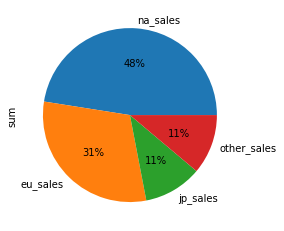

In [251]:
dict_region = {
    'na_sales': data_actual['na_sales'].sum(),
    'eu_sales': data_actual['eu_sales'].sum(),
    'jp_sales': data_actual['jp_sales'].sum(),
    'other_sales': data_actual['other_sales'].sum()
}
df_region = pd.DataFrame(data=dict_region.values(), index=dict_region.keys(), columns=['sum'])
df_region['sum'].plot(kind='pie', autopct='%1.0f%%')

Видно, что на регионы *na* и *eu* приходится почти 80% всех продаж. Данные регионы должны считаться ключевыми для реализации продукта ввиды большой ёмкости рынка.

Теперь ознакомимся с самыми популярными платформами для каждого региона.

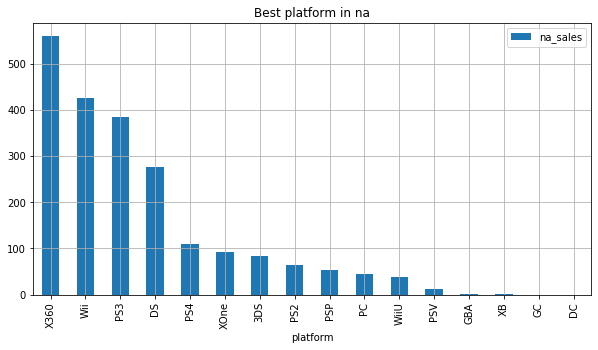

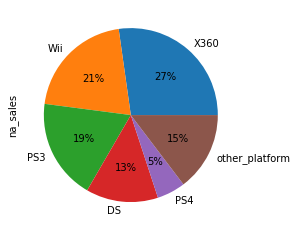

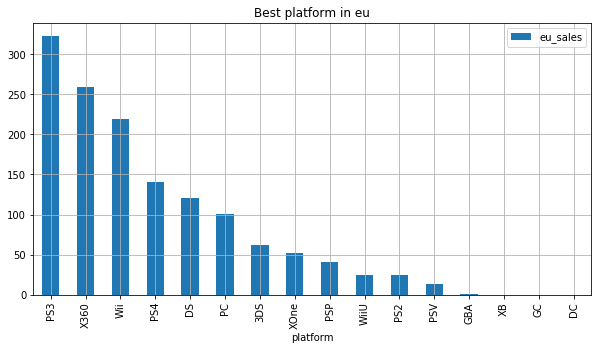

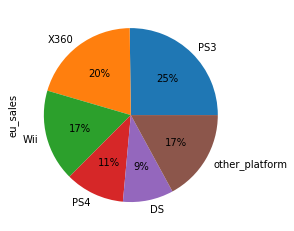

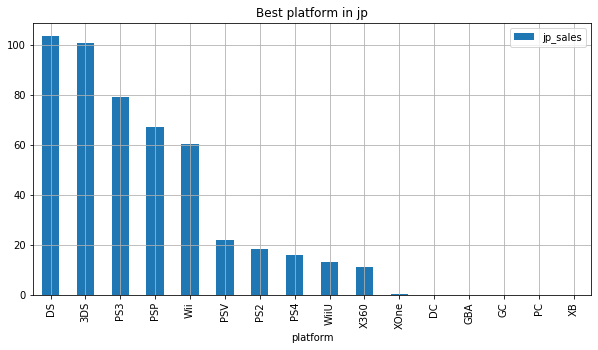

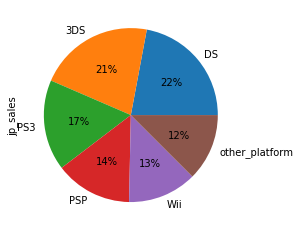

In [252]:
columns = ['na_sales', 'eu_sales', 'jp_sales']
best_platform = []
for name in columns:
    platform_region = (data_actual
        .pivot_table(index='platform', values=name, aggfunc='sum')
        .sort_values(by=name, ascending=False))
    platform_region.plot(kind='bar', grid=True, figsize=(10,5), title=f'Best platform in {name[:2]}')
    plt.show()
    best_platform.append(set(platform_region.iloc[:5].index))
    dict_other = {name: platform_region.iloc[6:][name].sum()}
    df2 = pd.DataFrame(dict_other, index=['other_platform'])
    (platform_region.iloc[:5]
        .append(df2))[name].plot(kind='pie', autopct='%1.0f%%')
    plt.show()

In [253]:
all_best_p = best_platform[0] | best_platform[1]
for k in range(2 ,len(best_platform)):
    all_best_p = all_best_p | best_platform[k]

joint_best_p = best_platform[0] & best_platform[1]
for k in range(2 ,len(best_platform)):
    joint_best_p = joint_best_p & best_platform[k]

print('Все топ-5 платформы для всех регионов:', *all_best_p)
print('Общие топ-5 платформ для всех регионов', *joint_best_p)

Все топ-5 платформы для всех регионов: PS4 Wii 3DS PSP X360 DS PS3
Общие топ-5 платформ для всех регионов Wii DS PS3


Во всех регионах в топ-5 входят платформы *PS3* *DS* *Wii*. Это объясняется тем, что в актуальный период вошел практический полный жизненный цикл консолей, они успели набрать популярность, и соответственно, игры на них имеют наилучшие покащатели продаж.

Отдельно стоит отметить платформы *3DS* и *PS5*. Это актуальные платформы, рост которых должен продалжаться ближайшее время. При этом *PS5* особенно интересна тем, что входит в топ-5 самых ёмких ринков - NA и EU.

Далее, рассмотрим популярность различных жанров на каждом рынке.

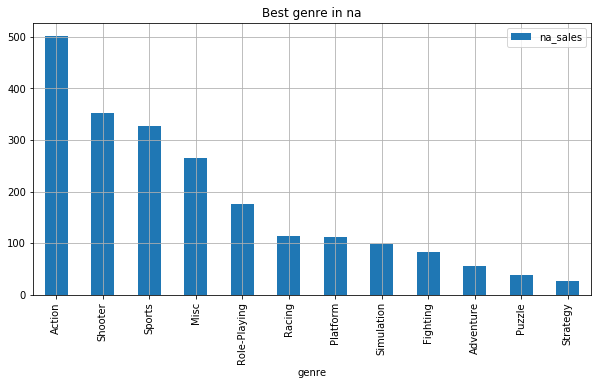

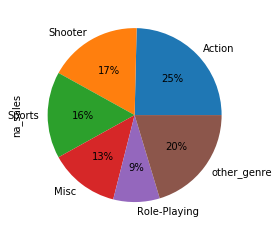

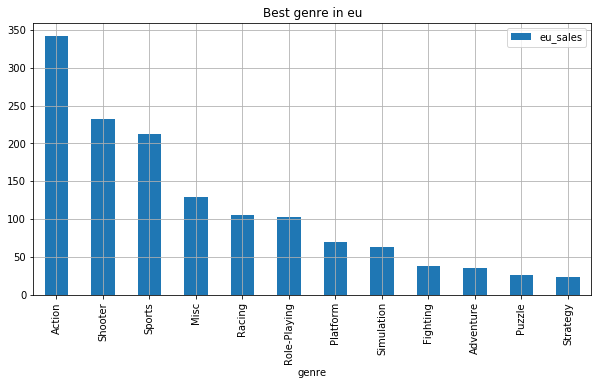

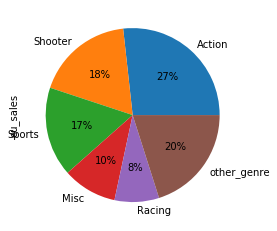

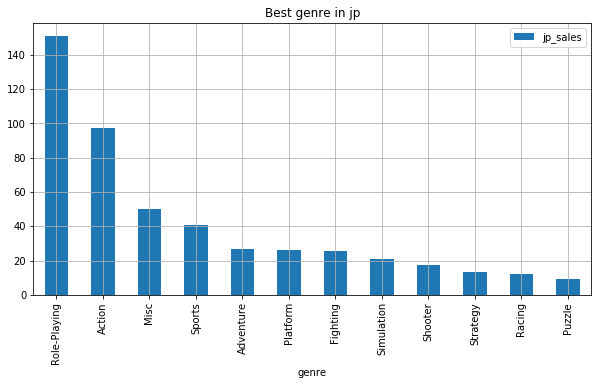

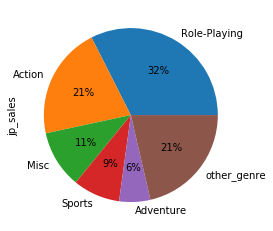

In [254]:
columns = ['na_sales', 'eu_sales', 'jp_sales']
best_genre = []
for name in columns:
    platform_region = (data_actual
        .pivot_table(index='genre', values=name, aggfunc='sum')
        .sort_values(by=name, ascending=False))
    platform_region.plot(kind='bar', grid=True, figsize=(10,5), title=f'Best genre in {name[:2]}')
    plt.show()
    best_genre.append(set(platform_region.iloc[:5].index))
    dict_other = {name: platform_region.iloc[6:][name].sum()}
    df2 = pd.DataFrame(dict_other, index=['other_genre'])
    (platform_region.iloc[:5]
        .append(df2))[name].plot(kind='pie', autopct='%1.0f%%')

In [255]:
all_best_g = best_genre[0] | best_genre[1]
for k in range(2 ,len(best_genre)):
    all_best_g = all_best_g | best_genre[k]

joint_best_g = best_genre[0] & best_genre[1]
for k in range(2 ,len(best_genre)):
    joint_best_g = joint_best_g & best_genre[k]

print('Все топ-5 жанров для всех регионов:', *all_best_g)
print('Общие топ-5 жанров для всех регионов', *joint_best_g)

Все топ-5 жанров для всех регионов: Adventure Sports Shooter Role-Playing Action Racing Misc
Общие топ-5 жанров для всех регионов Sports Misc Action


По жанрам, во всех регионах в топ-5 входят жанры *Misc* *Sports* *Action*. Они выглядят наиболее привлекательными с точки хрения наибольшего охвата аудитории.

Так же стоит отметить жанр *Role-Playing*, которые взодит в топ-5 двух рынков - NA и JP. Причем, по всей видимости, ввиду специфики рынка JP, этот жанра там уверенно лидирует по популярности.

Далее, рассмотрим влияние рейтинга ESRB на продажи в каждом регионе.

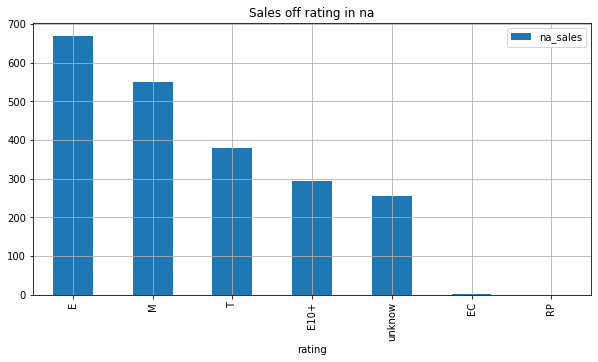

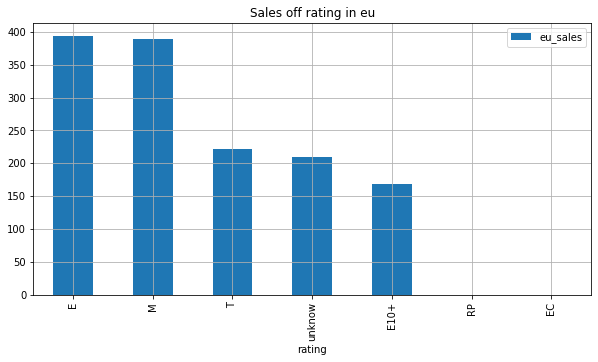

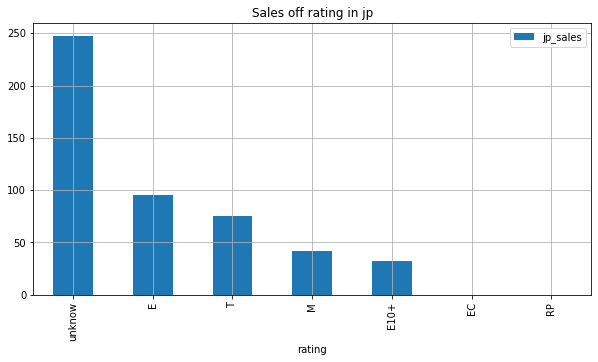

In [256]:
columns = ['na_sales', 'eu_sales', 'jp_sales']
for name in columns:
    platform_region = (data_actual
        .pivot_table(index='rating', values=name, aggfunc='sum')
        .sort_values(by=name, ascending=False))
    platform_region.plot(kind='bar', grid=True, figsize=(10,5), title=f'Sales off rating in {name[:2]}')
    plt.show()


В регионе NA и JP очевидно влияние рейтинга на продажи игр, топ-3 райтингов по продажам соответствуют уменьшающимся группам игроков - все игроки -> старше 13 -> старше 17 (для региона jp начиная с топ-2, ввиду того, что в топ-1 - неизвестный рейтинг).

В регионе EU заметно ниже. Продажи игр для всех и игр для людей старше 17 лет примерно равны, хотя очевидно, что база игроков, у игр райтинга E и T должна быть больше.

### Выводы

В данной главе были проанализированный наиболее популярные жанры и платформы для каждого региона, а так же установлено влияние рейтинга ESRB на продажи игр. Было установлено, что:

1) Во всех регионах в топ-5 популярных платформ входят *PS3* *DS* *Wii*. В регионах NA и EU в топ-5 входит новая платформа PS4.

2) Во всех регионах в топ-5 популярных жанров входят *Misc* *Sports* *Action*. В регионах NA и JP в топ-5 вхоит жанр *Role-Playing*.

3) Рейтинг ESRB оказывает влияние на продажи в регионах NA и JP.

## Проверка гипотез

Далее проверим следующие гипотезы:

1) Средние пользовательские рейтинги платформ Xbox One и PC одинаковые.

2) Средние пользовательские рейтинги жанров Action и Sports разные.

Сформируем нулевые гипотезы:

1) Пользовательский рейтинг платформы Xbox One **равен** среднему пользовательскому рейтингу платформы PC.

2) Пользовательский рейтинг платформы Action **не равен** среднему пользовательскому рейтингу платформы Sports.

И альтернативные:

1) Пользовательский рейтинг платформы Xbox One **не равен** среднему пользовательскому рейтингу платформы PC.

2) Пользовательский рейтинг платформы Action **равен** среднему пользовательскому рейтингу платформы Sports.

Пороговое значение значимости примем равное 0.01.
Для проверки гипотез воспользуемся методом ttest_ind для независимых выборок.

Проверим, что для выбранных гипотез, справедливо, что:

1) Все распределения являются *нормальными*;

2) Дисперсии можно считать *равными*;

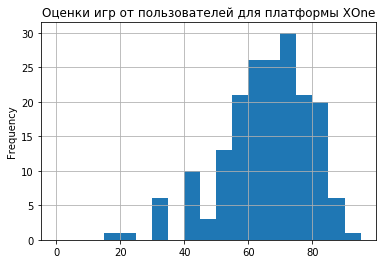

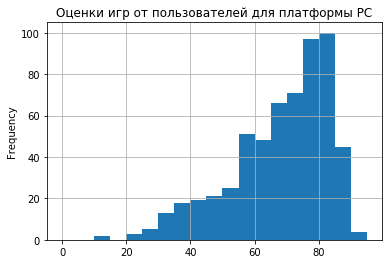

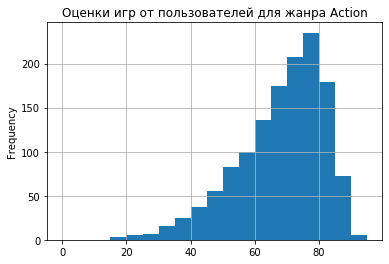

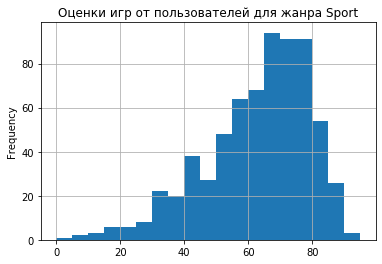

In [257]:
data_st = data_actual.query('user_score != 0')
(data_st.query('platform == "XOne"')['user_score']
    .plot(kind='hist', grid=True, bins=[x for x in range(0,100, 5)],
          title='Оценки игр от пользователей для платформы XOne'))
plt.show()
(data_st.query('platform == "PC"')['user_score']
    .plot(kind='hist', grid=True, bins=[x for x in range(0,100, 5)],
          title='Оценки игр от пользователей для платформы PC'))
plt.show()
(data_st.query('genre == "Action"')['user_score']
     .plot(kind='hist', grid=True, bins=[x for x in range(0,100, 5)],
          title='Оценки игр от пользователей для жанра Action'))
plt.show()
(data_st.query('genre == "Sports"')['user_score']
     .plot(kind='hist', grid=True, bins=[x for x in range(0,100, 5)],
          title='Оценки игр от пользователей для жанра Sport'))
plt.show()

Из гистограмм видно, что все распределние нормальные, но смещены вправо.

In [258]:
print('Дисперсия для первой нулевой гипотегы, для платформы Xone',
      (data_st.query('platform == "XOne"')['user_score'].var(ddof=1).round(2)))
print('Дисперсия для первой нулевой гипотегы, для платформы PC',
      (data_st.query('platform == "PC"')['user_score'].var(ddof=1).round(2)))
print('_______________________________________________')
print('Дисперсия для второй нулевой гипотегы, для жанра Action',
      (data_st.query('genre == "Action"')['user_score'].var(ddof=1).round(2)))
print('Дисперсия для второй нулевой гипотегы, для жанра Sports',
      (data_st.query('genre == "Sports"')['user_score'].var(ddof=1).round(2)))

Дисперсия для первой нулевой гипотегы, для платформы Xone 189.93
Дисперсия для первой нулевой гипотегы, для платформы PC 232.12
_______________________________________________
Дисперсия для второй нулевой гипотегы, для жанра Action 186.65
Дисперсия для второй нулевой гипотегы, для жанра Sports 267.77


Из расчётов видно, что дисперсие отличаются менее, чем в 1.5 раза.

In [259]:
data_st = data_actual.query('user_score != 0')
print('Размер выборки без пропущенных значений пользовательского рейтинга', data_st.shape[0])
print('Размер выборки для XOne', data_st.query('platform == "XOne"').shape[0])
print('Размер выборки для PC', data_st.query('platform == "PC"').shape[0])
result = st.ttest_ind(data_st.query('platform == "XOne"')['user_score'], data_st.query('platform == "PC"')['user_score'])
alpha = 0.01
print('p-значение: ', result.pvalue)
if result.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Гипотеза не отвергнута')
    
print('Средняя оценка пользователей на Xone', (data_st.query('platform == "XOne"')['user_score'].mean()).round(2))
print('Средняя оценка пользователей на PC', (data_st.query('platform == "PC"')['user_score'].mean()).round(2))

Размер выборки без пропущенных значений пользовательского рейтинга 4912
Размер выборки для XOne 185
Размер выборки для PC 588
p-значение:  0.0425148146258388
Гипотеза не отвергнута
Средняя оценка пользователей на Xone 65.13
Средняя оценка пользователей на PC 67.68


In [260]:
data_st = data_actual.query('user_score != 0')
print('Размер выборки без пропущенных значений пользовательского рейтинга', data_st.shape[0])
print('Размер выборки для Action', data_st.query('genre == "Action"').shape[0])
print('Размер выборки для Sports', data_st.query('genre == "Sports"').shape[0])
result = st.ttest_ind(data_st.query('genre == "Action"')['user_score'], data_st.query('genre == "Sports"')['user_score'])
alpha = 0.01
print('p-значение: ', result.pvalue)
if result.pvalue > alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Гипотеза не отвергнута')
    
print('Средняя оценка пользователей жанра Action', (data_st.query('genre == "Action"')['user_score'].mean()).round(2))
print('Средняя оценка пользователей жанра Sports', (data_st.query('genre == "Sports"')['user_score'].mean()).round(2))

Размер выборки без пропущенных значений пользовательского рейтинга 4912
Размер выборки для Action 1340
Размер выборки для Sports 672
p-значение:  7.397736524283585e-13
Гипотеза не отвергнута
Средняя оценка пользователей жанра Action 67.42
Средняя оценка пользователей жанра Sports 62.44


В обоих случаях, мы не можем отвергнуть нулевую гипотезу.

## Вывод

В ходе данной работы был получен и обработан файл с данными, произведена предварительная подготовка данных, в ходе которой были заполнены пропуски в данных, приведены типы данных, данные были проверены на дубликаты.

Далее был произведен исследовательский анализ данных, в ходе которого было установлено, что:

1) Актуальным периодом, данные за которые следуетпринять во внимание, является период с 2007 по 2016 год.

2) Платформы PS4, XOne, WiiU показывают рост в последние годы. Стоит сконцентрировать внимание на них.

3) Оценки критиков сильное влияют на объем продаж игр, сильнее чем оценки пользователей.

4) По абсолютным показателям, лучше всего продаются игры жанров Action, Shooter и Sports. По относительным (на количество игр жанра) лучше всего себя показывают игры жанров: Shooter и Platform.

5) На регионы NA и EU приходится почти 80% проданных копий игр.

6) Были сформированы "портреты" пользователей для каждого рынка.

7) Были сформулированы нулевые и альтернативные гипотезы и произведена их проверка.